In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Dealing with NA values

In [4]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [5]:
df.fillna(value=0,inplace=True)

In [6]:
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

## Exploring the data

### Gender & Age

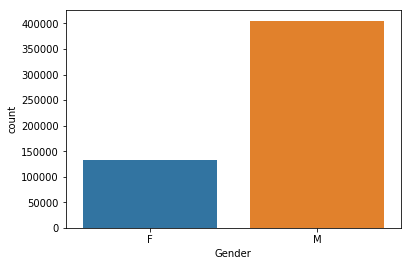

In [7]:
sns.countplot(df['Gender'])

To conclude the graph above, we can see that the most of transactions were done by Males

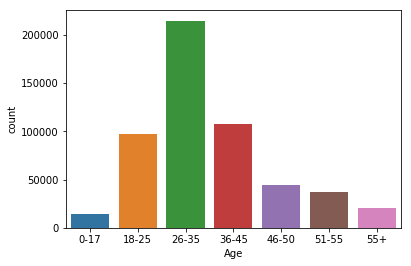

In [8]:
sns.countplot(df['Age'], order=df['Age'].value_counts().index.sort_values())

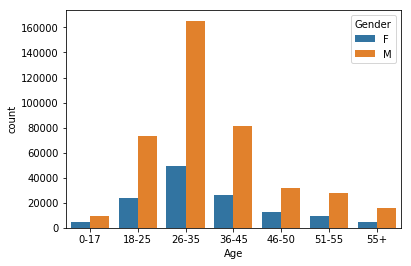

In [9]:
sns.countplot(df['Age'],hue=df['Gender'], order=df['Age'].value_counts().index.sort_values())

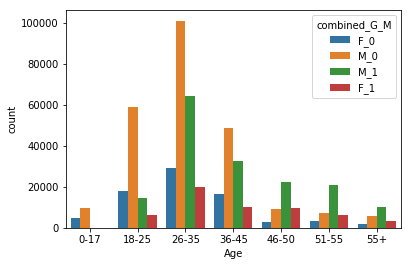

In [10]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
sns.countplot(df['Age'],
              hue=df['combined_G_M'],
              order=df['Age'].value_counts().index.sort_values())

#### Conclusions: 

 - From the plots above we can see that the greatest amount of transactions were done by unmarried males in the age of 26-35

 - After the age 45, the majority of transactions is done by married males. One may conclude that the data reflects that ladies do shop, but their spouses are making transactions
 - The data is distributed normally which does make sense

### City

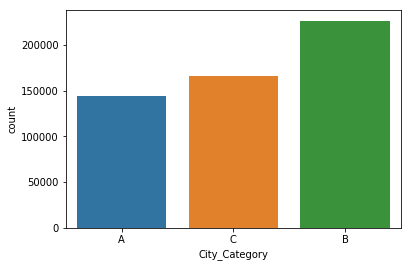

In [11]:
sns.countplot(df['City_Category'])

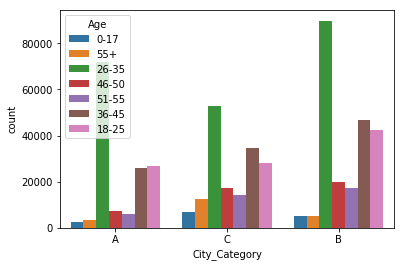

In [12]:
sns.countplot(df['City_Category'],hue=df['Age'])

### Purchase analysis

(array([1.9910e+03, 5.9270e+03, 4.7010e+03, 1.3978e+04, 5.5780e+03,
        5.8640e+03, 1.0280e+04, 1.9631e+04, 1.4013e+04, 7.4490e+03,
        3.2790e+04, 1.4074e+04, 2.8051e+04, 2.3240e+03, 5.2870e+04,
        1.2412e+04, 5.2928e+04, 2.1431e+04, 1.5522e+04, 2.1510e+03,
        3.5055e+04, 1.5100e+03, 6.1990e+03, 1.1743e+04, 2.4672e+04,
        7.4090e+03, 7.4120e+03, 7.3750e+03, 2.3380e+03, 4.4600e+02,
        4.9800e+02, 1.5047e+04, 2.9203e+04, 1.1273e+04, 7.9070e+03,
        1.8590e+03, 2.3900e+02, 3.6000e+01, 8.3300e+02, 1.0470e+04,
        1.7761e+04, 3.0060e+03, 5.5060e+03, 2.6380e+03, 8.6100e+02,
        0.0000e+00, 0.0000e+00, 3.5000e+01, 1.1460e+03, 1.1350e+03]),
 array([  185.  ,   660.52,  1136.04,  1611.56,  2087.08,  2562.6 ,
         3038.12,  3513.64,  3989.16,  4464.68,  4940.2 ,  5415.72,
         5891.24,  6366.76,  6842.28,  7317.8 ,  7793.32,  8268.84,
         8744.36,  9219.88,  9695.4 , 10170.92, 10646.44, 11121.96,
        11597.48, 12073.  , 12548.52, 13024.04

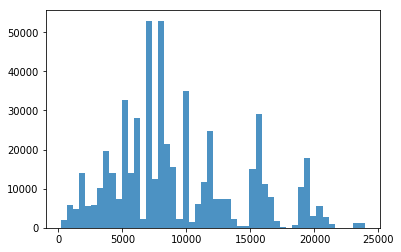

In [13]:
plt.hist(df['Purchase'],bins=50, alpha=0.8)

We can see that is is skewed to the right, but resembles normal distribution

Let's see the most popular products

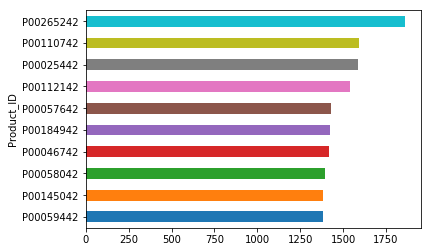

In [14]:
df.groupby('Product_ID')['Purchase'].count().nlargest(10).sort_values().plot('barh')

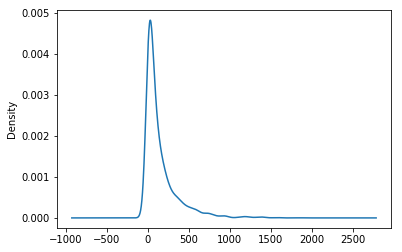

In [17]:
df.groupby('Product_ID').count()['User_ID'].plot('density')